<h1>ENB29 - Revisiting FFNs with K-fold cross validation</h1>
<h2> no. of layers </h2>

In [1]:
import tensorflow as tf
import keras
from keras import models
from keras import layers

import numpy as np
import os
import csv

import pickle
import time as tm

import matplotlib.pyplot as plt
import pre_process as pp

Using TensorFlow backend.


<h2> Loading the datasets</h2>

In [2]:
with open('train_data.txt', 'rb') as fp:
    train_data = pickle.load(fp)
    
with open('train_labels.txt', 'rb') as fp:
    train_labels = pickle.load(fp)
    
with open('test_data.txt', 'rb') as fp:
    test_data = pickle.load(fp)
    
with open('test_labels.txt', 'rb') as fp:
    test_labels = pickle.load(fp)

<h2>k-fold params</h2>

In [3]:
k = 4
num_val_samples = len(train_data)
print(num_val_samples)
val_split_size = num_val_samples/k
val_split_size = int(val_split_size)
print(val_split_size)
type(val_split_size)

72
18


int

<h2>Experiment1: a single layer</h2>

In [4]:
net1 = models.Sequential()
net1.add(layers.Dense((240), input_shape = (480,6)))
net1.add(layers.Flatten())
net1.add(layers.Dense(240,activation='relu'))
net1.add(layers.Dense(240,activation='relu'))
net1.add(layers.Dense(240,activation='relu'))
net1.add(layers.Dense(7, activation = 'softmax'))
net1.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 480, 240)          1680      
_________________________________________________________________
flatten_1 (Flatten)          (None, 115200)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 240)               27648240  
_________________________________________________________________
dense_3 (Dense)              (None, 240)               57840     
_________________________________________________________________
dense_4 (Dense)              (None, 240)               57840     
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 1687      
Total params: 27,767,287
Trainable para

In [5]:
net1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net1.save_weights('net1.h5')  # each split will start with same weights so can directly compare results

In [6]:

histories1 = []
results_list1 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net1.load_weights('net1.h5')
    history = net1.fit(train_fold, train_tgt, epochs = 25, validation_data = (val_fold, val_tgt))

    histories1.append(history)
    
    
    results = net1.evaluate(test_data, test_labels)
    results_list1.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size
    
finish = tm.time()
duration1 = finish - start

0

Train on 54 samples, validate on 18 samples
Epoch 1/25
54/54 [==============================] - 1s 14ms/step - loss: 2.8707 - accuracy: 0.1296 - val_loss: 4.0802 - val_accuracy: 0.2778
Epoch 2/25
54/54 [==============================] - 1s 11ms/step - loss: 5.1505 - accuracy: 0.1111 - val_loss: 2.4768 - val_accuracy: 0.1667
Epoch 3/25
54/54 [==============================] - 1s 11ms/step - loss: 2.3863 - accuracy: 0.2037 - val_loss: 3.2080 - val_accuracy: 0.1111
Epoch 4/25
54/54 [==============================] - 1s 12ms/step - loss: 2.3305 - accuracy: 0.2778 - val_loss: 1.9185 - val_accuracy: 0.3333
Epoch 5/25
54/54 [==============================] - 1s 12ms/step - loss: 2.0030 - accuracy: 0.2963 - val_loss: 1.3500 - val_accuracy: 0.5556
Epoch 6/25
54/54 [==============================] - 1s 12ms/step - loss: 1.2522 - accuracy: 0.6667 - val_loss: 1.5833 - val_accuracy: 0.3333
Epoch 7/25
54/54 [==============================] - 1s 12ms/step - loss: 1.3128 - accuracy: 0.5185 - val_lo

Epoch 5/25
54/54 [==============================] - 1s 12ms/step - loss: 1.3228 - accuracy: 0.4444 - val_loss: 1.9072 - val_accuracy: 0.5000
Epoch 6/25
54/54 [==============================] - 1s 12ms/step - loss: 1.6227 - accuracy: 0.5741 - val_loss: 1.2715 - val_accuracy: 0.4444
Epoch 7/25
54/54 [==============================] - 1s 12ms/step - loss: 0.9226 - accuracy: 0.7037 - val_loss: 1.6717 - val_accuracy: 0.2222
Epoch 8/25
54/54 [==============================] - 1s 12ms/step - loss: 1.1490 - accuracy: 0.5185 - val_loss: 1.4722 - val_accuracy: 0.5000
Epoch 9/25
54/54 [==============================] - 1s 12ms/step - loss: 1.0250 - accuracy: 0.5185 - val_loss: 1.0556 - val_accuracy: 0.5000
Epoch 10/25
54/54 [==============================] - 1s 12ms/step - loss: 0.9659 - accuracy: 0.6481 - val_loss: 1.1749 - val_accuracy: 0.3333
Epoch 11/25
54/54 [==============================] - 1s 12ms/step - loss: 0.6670 - accuracy: 0.6852 - val_loss: 1.2592 - val_accuracy: 0.6111
Epoch 12/25

In [7]:
avg = np.mean(results_list1, axis=0)
std_dev = np.std(results_list1, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration1))

Average loss and accuracy scores were:  [0.42750996 0.81666668]
Standard deviation for loss & accuracy:  [0.09106801 0.05527708]
Duration in seconds:  65


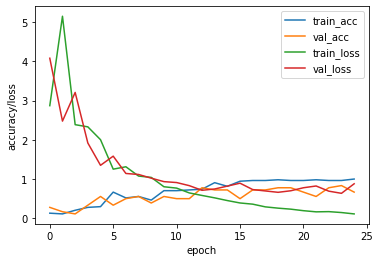

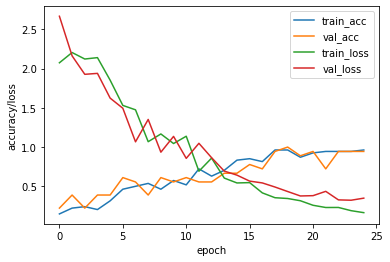

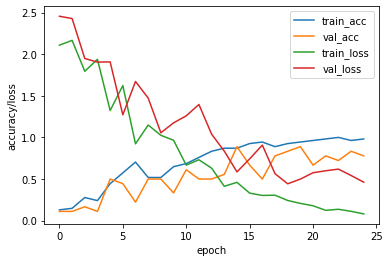

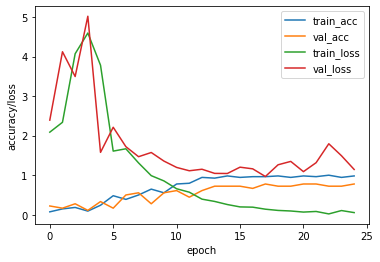

In [10]:
for hist in histories1:
    pp.plot_hist(hist)

<h2> Expriment2:</h2>

In [8]:
net2 = models.Sequential()
net2.add(layers.Dense((360), input_shape = (480,6)))
net2.add(layers.Flatten())
net2.add(layers.Dense(360,activation='relu'))
net2.add(layers.Dense(360,activation='relu'))
net2.add(layers.Dense(360,activation='sigmoid'))
net2.add(layers.Dense(7, activation = 'softmax'))
net2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 480, 360)          2520      
_________________________________________________________________
flatten_2 (Flatten)          (None, 172800)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 360)               62208360  
_________________________________________________________________
dense_8 (Dense)              (None, 360)               129960    
_________________________________________________________________
dense_9 (Dense)              (None, 360)               129960    
_________________________________________________________________
dense_10 (Dense)             (None, 7)                 2527      
Total params: 62,473,327
Trainable params: 62,473,327
Non-trainable params: 0
__________________________________________

In [9]:
net2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net2.save_weights('net2.h5')  # each split will start with same weights so can directly compare results

histories2 = []
results_list2 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net2.load_weights('net2.h5')
    history = net2.fit(train_fold, train_tgt, epochs = 50, validation_data = (val_fold, val_tgt))

    histories2.append(history)
    
    
    results = net2.evaluate(test_data, test_labels)
    results_list2.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration2 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/50
54/54 [==============================] - 2s 28ms/step - loss: 2.3257 - accuracy: 0.1111 - val_loss: 2.3668 - val_accuracy: 0.3889
Epoch 2/50
54/54 [==============================] - 1s 27ms/step - loss: 2.1941 - accuracy: 0.4074 - val_loss: 2.1059 - val_accuracy: 0.2222
Epoch 3/50
54/54 [==============================] - 1s 27ms/step - loss: 1.9074 - accuracy: 0.3333 - val_loss: 1.8042 - val_accuracy: 0.1111
Epoch 4/50
54/54 [==============================] - 1s 27ms/step - loss: 1.7305 - accuracy: 0.3333 - val_loss: 1.5986 - val_accuracy: 0.5000
Epoch 5/50
54/54 [==============================] - 1s 27ms/step - loss: 1.6251 - accuracy: 0.5000 - val_loss: 1.5240 - val_accuracy: 0.3333
Epoch 6/50
54/54 [==============================] - 1s 28ms/step - loss: 1.4531 - accuracy: 0.4815 - val_loss: 1.4342 - val_accuracy: 0.5000
Epoch 7/50
54/54 [==============================] - 1s 28ms/step - loss: 1.4111 - accuracy: 0.5185 - val_los

54/54 [==============================] - 1s 26ms/step - loss: 1.5247 - accuracy: 0.5000 - val_loss: 1.3687 - val_accuracy: 0.6667
Epoch 8/50
54/54 [==============================] - 1s 27ms/step - loss: 1.4221 - accuracy: 0.5741 - val_loss: 1.3491 - val_accuracy: 0.6667
Epoch 9/50
54/54 [==============================] - 1s 28ms/step - loss: 1.3610 - accuracy: 0.5926 - val_loss: 1.2445 - val_accuracy: 0.5556
Epoch 10/50
54/54 [==============================] - 1s 27ms/step - loss: 1.2913 - accuracy: 0.6111 - val_loss: 1.2061 - val_accuracy: 0.5000
Epoch 11/50
54/54 [==============================] - 1s 26ms/step - loss: 1.2777 - accuracy: 0.4815 - val_loss: 1.1840 - val_accuracy: 0.5556
Epoch 12/50
54/54 [==============================] - 1s 26ms/step - loss: 1.2182 - accuracy: 0.6296 - val_loss: 1.0673 - val_accuracy: 0.7222
Epoch 13/50
54/54 [==============================] - 1s 27ms/step - loss: 1.1658 - accuracy: 0.6852 - val_loss: 1.0557 - val_accuracy: 0.7778
Epoch 14/50
54/54 [=

Epoch 14/50
54/54 [==============================] - 1s 27ms/step - loss: 1.5696 - accuracy: 0.5556 - val_loss: 1.9827 - val_accuracy: 0.2222
Epoch 15/50
54/54 [==============================] - 2s 28ms/step - loss: 1.5635 - accuracy: 0.3889 - val_loss: 1.9674 - val_accuracy: 0.2222
Epoch 16/50
54/54 [==============================] - 1s 27ms/step - loss: 1.5399 - accuracy: 0.3889 - val_loss: 1.9755 - val_accuracy: 0.2222
Epoch 17/50
54/54 [==============================] - 1s 27ms/step - loss: 1.5291 - accuracy: 0.3889 - val_loss: 1.9028 - val_accuracy: 0.2222
Epoch 18/50
54/54 [==============================] - 1s 27ms/step - loss: 1.4777 - accuracy: 0.5000 - val_loss: 1.8386 - val_accuracy: 0.3333
Epoch 19/50
54/54 [==============================] - 1s 27ms/step - loss: 1.4329 - accuracy: 0.6111 - val_loss: 1.7998 - val_accuracy: 0.3333
Epoch 20/50
54/54 [==============================] - 1s 26ms/step - loss: 1.4110 - accuracy: 0.5926 - val_loss: 1.7989 - val_accuracy: 0.3333
Epoch 

Epoch 21/50
54/54 [==============================] - 1s 27ms/step - loss: 1.0775 - accuracy: 0.6111 - val_loss: 1.4848 - val_accuracy: 0.5000
Epoch 22/50
54/54 [==============================] - 1s 27ms/step - loss: 1.0537 - accuracy: 0.6296 - val_loss: 1.4046 - val_accuracy: 0.5556
Epoch 23/50
54/54 [==============================] - 1s 27ms/step - loss: 1.0085 - accuracy: 0.7593 - val_loss: 1.4297 - val_accuracy: 0.3333
Epoch 24/50
54/54 [==============================] - 1s 27ms/step - loss: 0.9785 - accuracy: 0.7407 - val_loss: 1.4178 - val_accuracy: 0.5000
Epoch 25/50
54/54 [==============================] - 1s 27ms/step - loss: 0.9415 - accuracy: 0.7037 - val_loss: 1.3772 - val_accuracy: 0.5000
Epoch 26/50
54/54 [==============================] - 1s 27ms/step - loss: 0.9238 - accuracy: 0.7407 - val_loss: 1.3754 - val_accuracy: 0.3333
Epoch 27/50
54/54 [==============================] - 1s 27ms/step - loss: 0.8940 - accuracy: 0.7593 - val_loss: 1.3579 - val_accuracy: 0.3333
Epoch 

In [11]:
avg = np.mean(results_list2, axis=0)
std_dev = np.std(results_list2, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration2))

Average loss and accuracy scores were:  [0.58815487 0.78333335]
Standard deviation for loss & accuracy:  [0.19977111 0.02886751]
Duration in seconds:  295


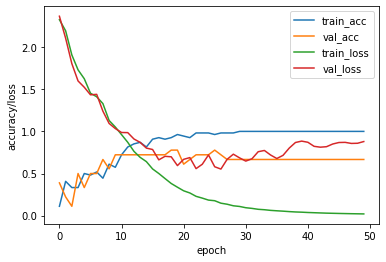

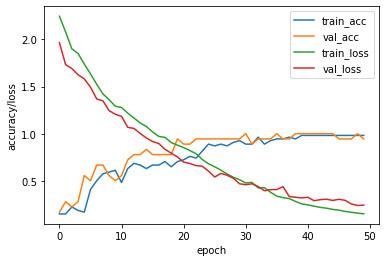

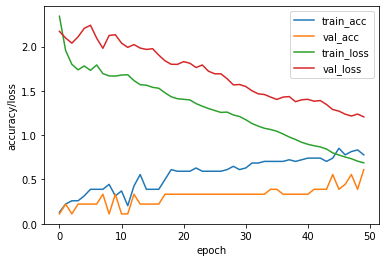

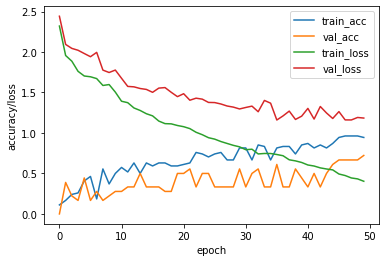

In [12]:
for hist in histories2:
    pp.plot_hist(hist)

<h2> Expriment3:</h2>

In [13]:
net3 = models.Sequential()
net3.add(layers.Dense((120), input_shape = (480,6)))
net3.add(layers.Flatten())
net3.add(layers.Dense(120,activation='relu'))
net3.add(layers.Dense(120,activation='relu'))
net3.add(layers.Dense(120,activation='relu'))
net3.add(layers.Dense(7, activation = 'softmax'))
net3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 480, 120)          840       
_________________________________________________________________
flatten_3 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 120)               6912120   
_________________________________________________________________
dense_13 (Dense)             (None, 120)               14520     
_________________________________________________________________
dense_14 (Dense)             (None, 120)               14520     
_________________________________________________________________
dense_15 (Dense)             (None, 7)                 847       
Total params: 6,942,847
Trainable params: 6,942,847
Non-trainable params: 0
____________________________________________

In [14]:
net3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net3.save_weights('net3.h5')  # each split will start with same weights so can directly compare results

histories3 = []
results_list3 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net3.load_weights('net3.h5')
    history = net3.fit(train_fold, train_tgt, epochs = 30, validation_data = (val_fold, val_tgt))

    histories3.append(history)
    
    
    results = net3.evaluate(test_data, test_labels)
    results_list3.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration3 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/30
54/54 [==============================] - 0s 5ms/step - loss: 2.3763 - accuracy: 0.1111 - val_loss: 2.4642 - val_accuracy: 0.1111
Epoch 2/30
54/54 [==============================] - 0s 3ms/step - loss: 2.2914 - accuracy: 0.2963 - val_loss: 1.8204 - val_accuracy: 0.3889
Epoch 3/30
54/54 [==============================] - 0s 3ms/step - loss: 1.8253 - accuracy: 0.2963 - val_loss: 1.6990 - val_accuracy: 0.3333
Epoch 4/30
54/54 [==============================] - 0s 3ms/step - loss: 1.5313 - accuracy: 0.3889 - val_loss: 1.3071 - val_accuracy: 0.5000
Epoch 5/30
54/54 [==============================] - 0s 3ms/step - loss: 1.4148 - accuracy: 0.2778 - val_loss: 1.2609 - val_accuracy: 0.3333
Epoch 6/30
54/54 [==============================] - 0s 3ms/step - loss: 1.2238 - accuracy: 0.5185 - val_loss: 1.1219 - val_accuracy: 0.3889
Epoch 7/30
54/54 [==============================] - 0s 3ms/step - loss: 1.0456 - accuracy: 0.6481 - val_loss: 1.01

Epoch 28/30
54/54 [==============================] - 0s 3ms/step - loss: 0.0826 - accuracy: 1.0000 - val_loss: 0.3007 - val_accuracy: 0.8333
Epoch 29/30
54/54 [==============================] - 0s 3ms/step - loss: 0.0784 - accuracy: 1.0000 - val_loss: 0.2401 - val_accuracy: 0.9444
Epoch 30/30
15/15 [==============================] - 0s 417us/step
[0.690447211265564, 0.6000000238418579]
2
Train on 54 samples, validate on 18 samples
Epoch 1/30
54/54 [==============================] - 0s 3ms/step - loss: 1.9939 - accuracy: 0.0926 - val_loss: 2.0166 - val_accuracy: 0.1111
Epoch 2/30
54/54 [==============================] - 0s 3ms/step - loss: 1.8155 - accuracy: 0.2407 - val_loss: 2.1153 - val_accuracy: 0.1111
Epoch 3/30
54/54 [==============================] - 0s 3ms/step - loss: 1.6845 - accuracy: 0.2778 - val_loss: 1.8709 - val_accuracy: 0.3889
Epoch 4/30
54/54 [==============================] - 0s 3ms/step - loss: 1.4692 - accuracy: 0.4259 - val_loss: 2.4122 - val_accuracy: 0.2222
Epoch

54/54 [==============================] - 0s 3ms/step - loss: 0.0609 - accuracy: 1.0000 - val_loss: 1.3441 - val_accuracy: 0.6667
Epoch 25/30
54/54 [==============================] - 0s 3ms/step - loss: 0.0810 - accuracy: 0.9815 - val_loss: 1.4328 - val_accuracy: 0.6111
Epoch 26/30
54/54 [==============================] - 0s 3ms/step - loss: 0.0564 - accuracy: 1.0000 - val_loss: 1.4869 - val_accuracy: 0.5556
Epoch 27/30
54/54 [==============================] - 0s 3ms/step - loss: 0.0542 - accuracy: 0.9815 - val_loss: 1.3917 - val_accuracy: 0.6111
Epoch 28/30
54/54 [==============================] - 0s 3ms/step - loss: 0.0461 - accuracy: 0.9815 - val_loss: 1.3097 - val_accuracy: 0.6111
Epoch 29/30
54/54 [==============================] - 0s 3ms/step - loss: 0.0414 - accuracy: 1.0000 - val_loss: 1.3233 - val_accuracy: 0.5556
Epoch 30/30
15/15 [==============================] - 0s 334us/step
[0.3207944631576538, 0.8666666746139526]


In [15]:
avg = np.mean(results_list3, axis=0)
std_dev = np.std(results_list3, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration3))

Average loss and accuracy scores were:  [0.60075888 0.71666668]
Standard deviation for loss & accuracy:  [0.18468375 0.09860132]
Duration in seconds:  20


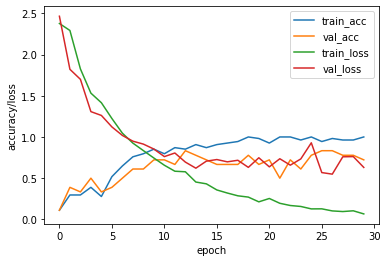

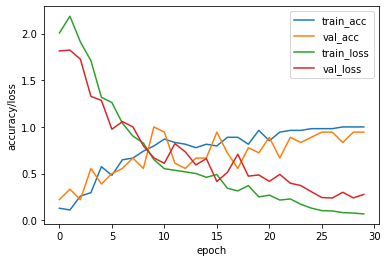

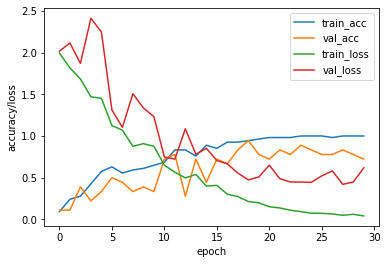

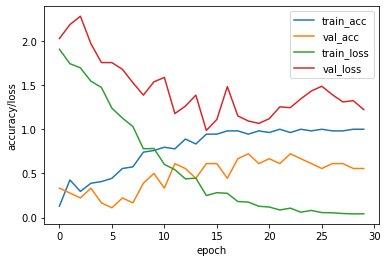

In [16]:
for hist in histories3:
    pp.plot_hist(hist)

<h2> Expriment3a:</h2>

In [17]:
net3 = models.Sequential()
net3.add(layers.Dense((300), input_shape = (480,6)))
net3.add(layers.Flatten())
net3.add(layers.Dense(300,activation='relu'))
net3.add(layers.Dense(300,activation='relu'))
net3.add(layers.Dense(300,activation='relu'))
net3.add(layers.Dense(7, activation = 'softmax'))
net3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 480, 300)          2100      
_________________________________________________________________
flatten_4 (Flatten)          (None, 144000)            0         
_________________________________________________________________
dense_17 (Dense)             (None, 300)               43200300  
_________________________________________________________________
dense_18 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_19 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_20 (Dense)             (None, 7)                 2107      
Total params: 43,385,107
Trainable params: 43,385,107
Non-trainable params: 0
__________________________________________

In [18]:
net3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net3.save_weights('net3.h5')  # each split will start with same weights so can directly compare results

histories3 = []
results_list3 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net3.load_weights('net3.h5')
    history = net3.fit(train_fold, train_tgt, epochs = 30, validation_data = (val_fold, val_tgt))

    histories3.append(history)
    
    
    results = net3.evaluate(test_data, test_labels)
    results_list3.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration3 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/30
54/54 [==============================] - 1s 21ms/step - loss: 3.4005 - accuracy: 0.1296 - val_loss: 5.0365 - val_accuracy: 0.1667
Epoch 2/30
54/54 [==============================] - 1s 19ms/step - loss: 8.5739 - accuracy: 0.1296 - val_loss: 7.0709 - val_accuracy: 0.1667
Epoch 3/30
54/54 [==============================] - 1s 18ms/step - loss: 6.6154 - accuracy: 0.1667 - val_loss: 6.0371 - val_accuracy: 0.0000e+00
Epoch 4/30
54/54 [==============================] - 1s 19ms/step - loss: 3.7449 - accuracy: 0.2407 - val_loss: 2.9344 - val_accuracy: 0.2222
Epoch 5/30
54/54 [==============================] - 1s 19ms/step - loss: 2.3817 - accuracy: 0.3148 - val_loss: 1.4523 - val_accuracy: 0.3333
Epoch 6/30
54/54 [==============================] - 1s 19ms/step - loss: 1.8833 - accuracy: 0.3704 - val_loss: 1.2985 - val_accuracy: 0.3889
Epoch 7/30
54/54 [==============================] - 1s 19ms/step - loss: 1.6168 - accuracy: 0.3704 - val

54/54 [==============================] - 1s 18ms/step - loss: 0.1289 - accuracy: 0.9815 - val_loss: 0.3826 - val_accuracy: 0.8333
Epoch 28/30
54/54 [==============================] - 1s 19ms/step - loss: 0.1112 - accuracy: 1.0000 - val_loss: 0.2809 - val_accuracy: 0.8889
Epoch 29/30
54/54 [==============================] - 1s 19ms/step - loss: 0.1160 - accuracy: 1.0000 - val_loss: 0.2643 - val_accuracy: 0.9444
Epoch 30/30
15/15 [==============================] - 0s 1ms/step
[0.622852087020874, 0.800000011920929]
2
Train on 54 samples, validate on 18 samples
Epoch 1/30
54/54 [==============================] - 1s 18ms/step - loss: 2.1000 - accuracy: 0.2222 - val_loss: 4.0961 - val_accuracy: 0.1111
Epoch 2/30
54/54 [==============================] - 1s 18ms/step - loss: 3.3917 - accuracy: 0.1111 - val_loss: 4.8898 - val_accuracy: 0.1111
Epoch 3/30
54/54 [==============================] - 1s 19ms/step - loss: 4.2419 - accuracy: 0.1296 - val_loss: 3.9622 - val_accuracy: 0.1111
Epoch 4/30
54

Epoch 23/30
54/54 [==============================] - 1s 19ms/step - loss: 0.1055 - accuracy: 0.9630 - val_loss: 1.3633 - val_accuracy: 0.6667
Epoch 24/30
54/54 [==============================] - 1s 19ms/step - loss: 0.0976 - accuracy: 0.9630 - val_loss: 1.6039 - val_accuracy: 0.6667
Epoch 25/30
54/54 [==============================] - 1s 20ms/step - loss: 0.0853 - accuracy: 0.9630 - val_loss: 1.3529 - val_accuracy: 0.7778
Epoch 26/30
54/54 [==============================] - 1s 19ms/step - loss: 0.0778 - accuracy: 0.9630 - val_loss: 1.3696 - val_accuracy: 0.7778
Epoch 27/30
54/54 [==============================] - 1s 19ms/step - loss: 0.0522 - accuracy: 0.9815 - val_loss: 1.7174 - val_accuracy: 0.6667
Epoch 28/30
54/54 [==============================] - 1s 19ms/step - loss: 0.0503 - accuracy: 0.9815 - val_loss: 1.6506 - val_accuracy: 0.7222
Epoch 29/30
54/54 [==============================] - 1s 19ms/step - loss: 0.0315 - accuracy: 1.0000 - val_loss: 1.4641 - val_accuracy: 0.7778
Epoch 

In [19]:
avg = np.mean(results_list3, axis=0)
std_dev = np.std(results_list3, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration3))

Average loss and accuracy scores were:  [0.54470759 0.80000001]
Standard deviation for loss & accuracy:  [0.05268263 0.04714045]
Duration in seconds:  124


<h2> Expriment4:</h2>

In [20]:
net4 = models.Sequential()
net4.add(layers.Dense((180), input_shape = (480,6)))
net4.add(layers.Flatten())
net4.add(layers.Dense(180,activation='relu'))
net4.add(layers.Dense(180,activation='relu'))
net4.add(layers.Dense(180,activation='relu'))

net4.add(layers.Dense(7, activation = 'softmax'))
net4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 480, 180)          1260      
_________________________________________________________________
flatten_5 (Flatten)          (None, 86400)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 180)               15552180  
_________________________________________________________________
dense_23 (Dense)             (None, 180)               32580     
_________________________________________________________________
dense_24 (Dense)             (None, 180)               32580     
_________________________________________________________________
dense_25 (Dense)             (None, 7)                 1267      
Total params: 15,619,867
Trainable params: 15,619,867
Non-trainable params: 0
__________________________________________

In [21]:
net4.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net4.save_weights('net4.h5')  # each split will start with same weights so can directly compare results

histories4 = []
results_list4 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net4.load_weights('net4.h5')
    history = net4.fit(train_fold, train_tgt, epochs = 30, validation_data = (val_fold, val_tgt))

    histories4.append(history)
    
    
    results = net4.evaluate(test_data, test_labels)
    results_list4.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration4 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/30
54/54 [==============================] - 1s 10ms/step - loss: 2.5855 - accuracy: 0.1481 - val_loss: 3.0406 - val_accuracy: 0.2778
Epoch 2/30
54/54 [==============================] - 0s 7ms/step - loss: 3.8636 - accuracy: 0.1481 - val_loss: 3.9351 - val_accuracy: 0.1667
Epoch 3/30
54/54 [==============================] - 0s 7ms/step - loss: 3.1398 - accuracy: 0.2037 - val_loss: 2.1388 - val_accuracy: 0.1667
Epoch 4/30
54/54 [==============================] - 0s 7ms/step - loss: 1.6857 - accuracy: 0.2037 - val_loss: 1.5368 - val_accuracy: 0.6111
Epoch 5/30
54/54 [==============================] - 0s 6ms/step - loss: 1.5635 - accuracy: 0.4444 - val_loss: 1.5264 - val_accuracy: 0.1667
Epoch 6/30
54/54 [==============================] - 0s 7ms/step - loss: 1.3025 - accuracy: 0.3704 - val_loss: 1.3782 - val_accuracy: 0.3333
Epoch 7/30
54/54 [==============================] - 0s 7ms/step - loss: 1.1250 - accuracy: 0.5556 - val_loss: 1.2

Epoch 28/30
54/54 [==============================] - 0s 7ms/step - loss: 0.0876 - accuracy: 0.9815 - val_loss: 0.2375 - val_accuracy: 1.0000
Epoch 29/30
54/54 [==============================] - 0s 7ms/step - loss: 0.0813 - accuracy: 0.9815 - val_loss: 0.2250 - val_accuracy: 1.0000
Epoch 30/30
15/15 [==============================] - 0s 1ms/step
[0.43796736001968384, 0.8666666746139526]
2
Train on 54 samples, validate on 18 samples
Epoch 1/30
54/54 [==============================] - 0s 7ms/step - loss: 1.9938 - accuracy: 0.1296 - val_loss: 2.5439 - val_accuracy: 0.1111
Epoch 2/30
54/54 [==============================] - 0s 7ms/step - loss: 2.0245 - accuracy: 0.1481 - val_loss: 2.0716 - val_accuracy: 0.1111
Epoch 3/30
54/54 [==============================] - 0s 7ms/step - loss: 1.7290 - accuracy: 0.3333 - val_loss: 2.1111 - val_accuracy: 0.1111
Epoch 4/30
54/54 [==============================] - 0s 7ms/step - loss: 1.5274 - accuracy: 0.3333 - val_loss: 1.7104 - val_accuracy: 0.3333
Epoch

54/54 [==============================] - 0s 7ms/step - loss: 0.1027 - accuracy: 0.9630 - val_loss: 2.2928 - val_accuracy: 0.5000
Epoch 25/30
54/54 [==============================] - 0s 7ms/step - loss: 0.0848 - accuracy: 0.9815 - val_loss: 1.5620 - val_accuracy: 0.7222
Epoch 26/30
54/54 [==============================] - 0s 7ms/step - loss: 0.0534 - accuracy: 0.9815 - val_loss: 1.4073 - val_accuracy: 0.7222
Epoch 27/30
54/54 [==============================] - 0s 7ms/step - loss: 0.0359 - accuracy: 1.0000 - val_loss: 1.6193 - val_accuracy: 0.6111
Epoch 28/30
54/54 [==============================] - 0s 7ms/step - loss: 0.0294 - accuracy: 1.0000 - val_loss: 1.7306 - val_accuracy: 0.5556
Epoch 29/30
54/54 [==============================] - 0s 7ms/step - loss: 0.0341 - accuracy: 1.0000 - val_loss: 1.6527 - val_accuracy: 0.6111
Epoch 30/30
15/15 [==============================] - 0s 838us/step
[0.23959819972515106, 0.9333333373069763]


In [22]:
avg = np.mean(results_list4, axis=0)
std_dev = np.std(results_list4, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration4))

Average loss and accuracy scores were:  [0.46000035 0.81666668]
Standard deviation for loss & accuracy:  [0.14266566 0.08660254]
Duration in seconds:  46


<h2> Expriment5:</h2>

In [17]:
net5 = models.Sequential()
net5.add(layers.Dense((480), input_shape = (480,6)))
net5.add(layers.Flatten())
net5.add(layers.Dense(240,activation='relu'))
net5.add(layers.Dense(240,activation='relu'))
net5.add(layers.Dense(240,activation='relu'))
net5.add(layers.Dense(240,activation='relu'))
net5.add(layers.Dense(240,activation='relu'))
net5.add(layers.Dense(7, activation = 'softmax'))
net5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
flatten_5 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_20 (Dense)             (None, 240)               55296240  
_________________________________________________________________
dense_21 (Dense)             (None, 240)               57840     
_________________________________________________________________
dense_22 (Dense)             (None, 240)               57840     
_________________________________________________________________
dense_23 (Dense)             (None, 240)               57840     
_________________________________________________________________
dense_24 (Dense)             (None, 240)              

In [18]:
net5.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net5.save_weights('net5.h5')  # each split will start with same weights so can directly compare results

histories5 = []
results_list5 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net5.load_weights('net5.h5')
    history = net5.fit(train_fold, train_tgt, epochs = 25, validation_data = (val_fold, val_tgt))

    histories5.append(history)
    
    
    results = net5.evaluate(test_data, test_labels)
    results_list5.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration5 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/25
54/54 [==============================] - 2s 29ms/step - loss: 2.6174 - accuracy: 0.1667 - val_loss: 3.0188 - val_accuracy: 0.1111
Epoch 2/25
54/54 [==============================] - 1s 27ms/step - loss: 2.6887 - accuracy: 0.0370 - val_loss: 4.3508 - val_accuracy: 0.2778
Epoch 3/25
54/54 [==============================] - 1s 26ms/step - loss: 3.8607 - accuracy: 0.1667 - val_loss: 2.7963 - val_accuracy: 0.3333
Epoch 4/25
54/54 [==============================] - 1s 27ms/step - loss: 2.3338 - accuracy: 0.2963 - val_loss: 2.3266 - val_accuracy: 0.1111
Epoch 5/25
54/54 [==============================] - 1s 26ms/step - loss: 1.9435 - accuracy: 0.2407 - val_loss: 1.5915 - val_accuracy: 0.1667
Epoch 6/25
54/54 [==============================] - 1s 26ms/step - loss: 1.5461 - accuracy: 0.3519 - val_loss: 1.3405 - val_accuracy: 0.5000
Epoch 7/25
54/54 [==============================] - 1s 27ms/step - loss: 1.4664 - accuracy: 0.4630 - val_los

In [19]:
avg = np.mean(results_list5, axis=0)
std_dev = np.std(results_list5, axis=0)
print('Avecrage loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration5))

Average loss and accuracy scores were:  [0.48017754 0.78333335]
Standard deviation for loss & accuracy:  [0.13127207 0.07264831]
Duration in seconds:  143


<h2> Expriment6:</h2>

In [5]:
net6 = models.Sequential()
net6.add(layers.Dense((480), input_shape = (480,6)))
net6.add(layers.Flatten())
net6.add(layers.Dense(240,activation='relu'))
net6.add(layers.Dense(240,activation='relu'))
net6.add(layers.Dense(240,activation='relu'))
net6.add(layers.Dense(240,activation='relu'))
net6.add(layers.Dense(240,activation='relu'))
net6.add(layers.Dense(240,activation='relu'))
net6.add(layers.Dense(240,activation='relu'))
net6.add(layers.Dense(240,activation='relu'))
net6.add(layers.Dense(240,activation='relu'))
net6.add(layers.Dense(240,activation='relu'))
net6.add(layers.Dense(7, activation = 'softmax'))
net6.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 480, 480)          3360      
_________________________________________________________________
flatten_1 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 240)               55296240  
_________________________________________________________________
dense_3 (Dense)              (None, 240)               57840     
_________________________________________________________________
dense_4 (Dense)              (None, 240)               57840     
_________________________________________________________________
dense_5 (Dense)              (None, 240)               57840     
_______________________________________

In [6]:
net6.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net6.save_weights('net6.h5')  # each split will start with same weights so can directly compare results

histories6 = []
results_list6 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net6.load_weights('net6.h5')
    history = net6.fit(train_fold, train_tgt, epochs = 50, validation_data = (val_fold, val_tgt))

    histories6.append(history)
    
    
    results = net6.evaluate(test_data, test_labels)
    results_list6.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration6 = finish - start

0

Train on 54 samples, validate on 18 samples
Epoch 1/50
54/54 [==============================] - 2s 30ms/step - loss: 2.3068 - accuracy: 0.0556 - val_loss: 2.0098 - val_accuracy: 0.1111
Epoch 2/50
54/54 [==============================] - 1s 26ms/step - loss: 1.9876 - accuracy: 0.1852 - val_loss: 1.8603 - val_accuracy: 0.2222
Epoch 3/50
54/54 [==============================] - 1s 27ms/step - loss: 1.9656 - accuracy: 0.1111 - val_loss: 1.8492 - val_accuracy: 0.2222
Epoch 4/50
54/54 [==============================] - 1s 27ms/step - loss: 1.8630 - accuracy: 0.1667 - val_loss: 1.7423 - val_accuracy: 0.2778
Epoch 5/50
54/54 [==============================] - 1s 27ms/step - loss: 1.8678 - accuracy: 0.1481 - val_loss: 1.6387 - val_accuracy: 0.3333
Epoch 6/50
54/54 [==============================] - 1s 27ms/step - loss: 1.7217 - accuracy: 0.2407 - val_loss: 1.5560 - val_accuracy: 0.3889
Epoch 7/50
54/54 [==============================] - 1s 26ms/step - loss: 1.5265 - accuracy: 0.4259 - val_lo

Epoch 6/50
54/54 [==============================] - 1s 26ms/step - loss: 2.2429 - accuracy: 0.1111 - val_loss: 1.5448 - val_accuracy: 0.3889
Epoch 7/50
54/54 [==============================] - 1s 27ms/step - loss: 1.8261 - accuracy: 0.2593 - val_loss: 1.5484 - val_accuracy: 0.4444
Epoch 8/50
54/54 [==============================] - 1s 27ms/step - loss: 1.6130 - accuracy: 0.3333 - val_loss: 1.1805 - val_accuracy: 0.6667
Epoch 9/50
54/54 [==============================] - 1s 26ms/step - loss: 1.3075 - accuracy: 0.5556 - val_loss: 1.9457 - val_accuracy: 0.0000e+00
Epoch 10/50
54/54 [==============================] - 1s 26ms/step - loss: 1.6692 - accuracy: 0.2593 - val_loss: 1.8445 - val_accuracy: 0.3889
Epoch 11/50
54/54 [==============================] - 1s 26ms/step - loss: 1.7817 - accuracy: 0.2593 - val_loss: 2.1007 - val_accuracy: 0.0000e+00
Epoch 12/50
54/54 [==============================] - 1s 27ms/step - loss: 1.8242 - accuracy: 0.2778 - val_loss: 1.2128 - val_accuracy: 0.5556
Ep

Epoch 13/50
54/54 [==============================] - 1s 27ms/step - loss: 1.1250 - accuracy: 0.4815 - val_loss: 1.1928 - val_accuracy: 0.3333
Epoch 14/50
54/54 [==============================] - 1s 26ms/step - loss: 1.1614 - accuracy: 0.5000 - val_loss: 1.4661 - val_accuracy: 0.3333
Epoch 15/50
54/54 [==============================] - 1s 26ms/step - loss: 0.8985 - accuracy: 0.6481 - val_loss: 1.7067 - val_accuracy: 0.3889
Epoch 16/50
54/54 [==============================] - 1s 26ms/step - loss: 0.9713 - accuracy: 0.6296 - val_loss: 1.3555 - val_accuracy: 0.5556
Epoch 17/50
54/54 [==============================] - 1s 26ms/step - loss: 0.8847 - accuracy: 0.6481 - val_loss: 1.1710 - val_accuracy: 0.5556
Epoch 18/50
54/54 [==============================] - 1s 27ms/step - loss: 0.8428 - accuracy: 0.5556 - val_loss: 1.3584 - val_accuracy: 0.3333
Epoch 19/50
54/54 [==============================] - 1s 27ms/step - loss: 1.1849 - accuracy: 0.5185 - val_loss: 1.3460 - val_accuracy: 0.3889
Epoch 

In [7]:
avg = np.mean(results_list6, axis=0)
std_dev = np.std(results_list6, axis=0)
print('Avecrage loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration6))

Avecrage loss and accuracy scores were:  [0.69876513 0.70000002]
Standard deviation for loss & accuracy:  [0.11579581 0.07453559]
Duration in seconds:  290
